The dataset is used for this competition is synthetic, but based on a real dataset and generated using a CTGAN. The original dataset deals with predicting the category on an eCommerce product given various attributes about the listing. Although the features are anonymized, they have properties relating to real-world features.

Submissions are evaluated using multi-class logarithmic loss.

In [66]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
print("Setup Complete")

Setup Complete


#### Loading the datasets

In [156]:
train_data = pd.read_csv("../input/tabular-playground-series-may-2021/train.csv", index_col="id")
# test_data = pd.read_csv("../input/tabular-playground-series-may-2021/test.csv", index_col="id")

print("Train data shape: ", train_data.shape)

train_data.head()

Train data shape:  (100000, 51)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,0,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,13,2,0,Class_1
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


#### Missing entries

In [59]:
# cheking for missing entries
train_data.isna().any().any()

False

Ok, so the dataset is clean. There is no missing data. 

#### Feature Cardinality

As all the features are anonymized and there are no data description available, we don't know which feature is numeric, categorial or meta.

count    50.000000
mean     27.100000
std      15.341354
min       4.000000
25%      17.000000
50%      25.500000
75%      34.500000
max      71.000000
dtype: float64


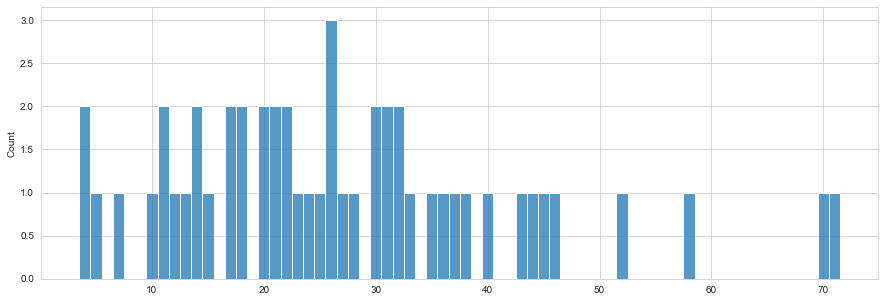

In [128]:
# checking for the cardinality of each features
card_series = train_data.drop(columns='target').agg(lambda x: x.nunique())

print(card_series.describe())

plt.figure(figsize=(15, 5))
sns.histplot(
    data=card_series,
    discrete=True
)
plt.show()

Compared to the number of entries in the dataset of 1e5, the cardinality of each features is really low. This heavily hints towards categorical features or numeric integer features.

#### Stats on the target classes

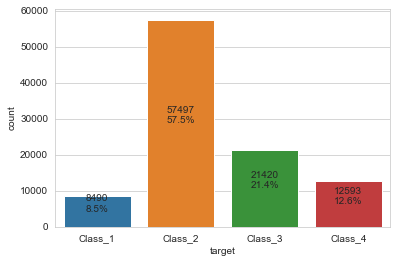

In [154]:
classes = np.sort(train_data.target.unique())

ax = sns.countplot(
    data=train_data,
    x='target',
    order=classes
)
for p, cls in zip(ax.patches, classes):
    count = train_data.value_counts('target')[cls]
    per = 100 * count/len(train_data)
    label = f"{count}\n{per:.1f}%"
    ax.annotate(
        label,
        (p.get_x()+0.4, p.get_height()/2),
        ha='center'
    )

plt.show()

##### Playing with log_loss function, with naive predictions as reference

In [176]:
from sklearn.metrics import log_loss

print(log_loss([0, 1, 2], [[1/5, 0, 1/5],[1/3, 1/3, 1/3], [1/3, 1/3, 1/3]]))
print(log_loss([0, 1], [[0.5, 0],[0, 0.5],]))

0.9634572526320557
1.9984014443252837e-15


In [178]:
np.log(1/4)

-1.3862943611198906

This is the score of the sample_submission.csv ! Equiprobabilty between all classes. This is the reference with no information apart from the number of classes.

In [179]:
0.09*np.log(0.09) +  0.57*np.log(0.57) + 0.21*np.log(0.21) + 0.13*np.log(0.13)

-1.1300876229702195

This score is obtained by taking into account the appearrance of each target class in the dataset. The score is improved.